In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gaussian import DynamicMultivariateNormal, VarianceExploding, VariancePreserving, SubVariancePreserving

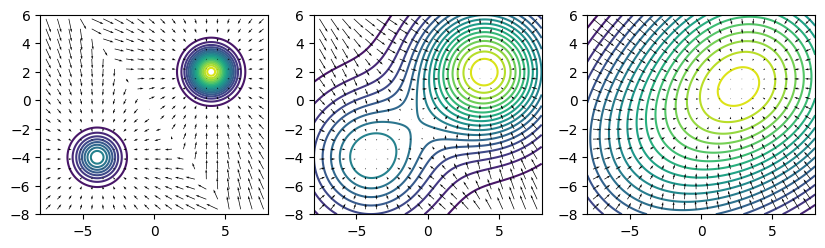

In [2]:
norm1 = DynamicMultivariateNormal(2, np.array([-4.0, -4.0]))
norm2 = DynamicMultivariateNormal(2, np.array([4.0, 2.0]))
mix = VarianceExploding((norm1, norm2), (1.0, 2.0))

x_fine = np.linspace(-8.0, 8.0, 200)
y_fine = np.linspace(-8.0, 6.0, 200)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
XY_fine = np.stack((X_fine, Y_fine), -1)

x_coarse = x_fine[5::10]
y_coarse = y_fine[5::10]
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
XY_coarse = np.stack((X_coarse, Y_coarse), -1)

def plot_density(ax, t):
    Z = mix.density(t, XY_fine)
    ax.contour(X_fine, Y_fine, Z, levels=20)
    UV = mix.score(t, XY_coarse)
    U, V = UV[:, :, 0], UV[:, :, 1]
    ax.quiver(X_coarse, Y_coarse, U, V, zorder=2)
    ax.set_aspect("equal")
    ax.set_xlim(x_fine.min(), x_fine.max())
    ax.set_ylim(y_fine.min(), y_fine.max())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

plot_density(ax1, 0.0)
plot_density(ax2, 3.0)
plot_density(ax3, 6.0)

In [3]:
num_sides = 6
th = 2.0 * np.pi / num_sides
rot_th = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])

var = np.diag([5.0, 0.5])
mean = np.array([0.0, 5.0])
norms = []
for _ in range(num_sides):
    norms.append(DynamicMultivariateNormal(2, mean, var))
    var = rot_th @ var @ rot_th.T
    mean = rot_th @ mean

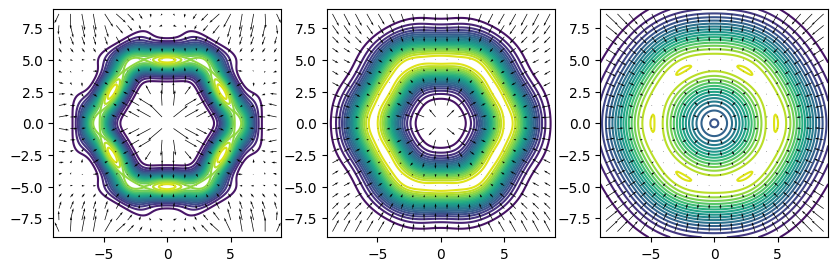

In [4]:
mix = VarianceExploding(tuple(norms))

x_fine = np.linspace(-9.0, 9.0, 200)
y_fine = np.linspace(-9.0, 9.0, 200)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
XY_fine = np.stack((X_fine, Y_fine), -1)

x_coarse = x_fine[5::10]
y_coarse = y_fine[5::10]
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
XY_coarse = np.stack((X_coarse, Y_coarse), -1)

def plot_density(ax, t):
    Z = mix.density(t, XY_fine)
    ax.contour(X_fine, Y_fine, Z, levels=20)
    UV = mix.score(t, XY_coarse)
    U, V = UV[:, :, 0], UV[:, :, 1]
    ax.quiver(X_coarse, Y_coarse, U, V, zorder=2)
    ax.set_aspect("equal")
    ax.set_xlim(x_fine.min(), x_fine.max())
    ax.set_ylim(y_fine.min(), y_fine.max())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

plot_density(ax1, 0.0)
plot_density(ax2, 1.0)
plot_density(ax3, 2.0)

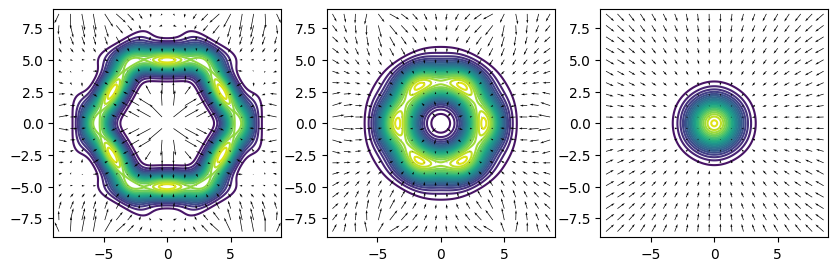

In [5]:
mix = VariancePreserving(tuple(norms))

x_fine = np.linspace(-9.0, 9.0, 200)
y_fine = np.linspace(-9.0, 9.0, 200)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
XY_fine = np.stack((X_fine, Y_fine), -1)

x_coarse = x_fine[5::10]
y_coarse = y_fine[5::10]
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
XY_coarse = np.stack((X_coarse, Y_coarse), -1)

def plot_density(ax, t):
    Z = mix.density(t, XY_fine)
    ax.contour(X_fine, Y_fine, Z, levels=20)
    UV = mix.score(t, XY_coarse)
    U, V = UV[:, :, 0], UV[:, :, 1]
    ax.quiver(X_coarse, Y_coarse, U, V, zorder=2)
    ax.set_aspect("equal")
    ax.set_xlim(x_fine.min(), x_fine.max())
    ax.set_ylim(y_fine.min(), y_fine.max())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

plot_density(ax1, 0.0)
plot_density(ax2, 0.3)
plot_density(ax3, 0.6)

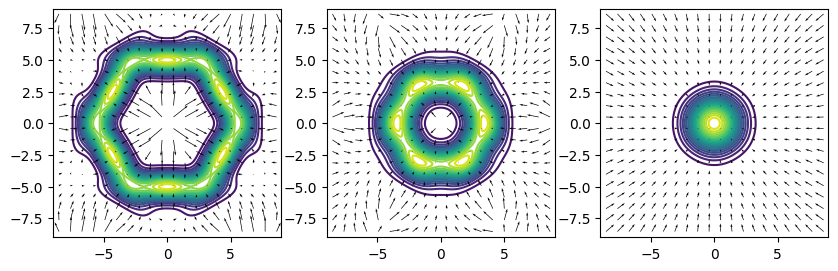

In [6]:
mix = SubVariancePreserving(tuple(norms))

x_fine = np.linspace(-9.0, 9.0, 200)
y_fine = np.linspace(-9.0, 9.0, 200)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
XY_fine = np.stack((X_fine, Y_fine), -1)

x_coarse = x_fine[5::10]
y_coarse = y_fine[5::10]
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
XY_coarse = np.stack((X_coarse, Y_coarse), -1)

def plot_density(ax, t):
    Z = mix.density(t, XY_fine)
    ax.contour(X_fine, Y_fine, Z, levels=20)
    UV = mix.score(t, XY_coarse)
    U, V = UV[:, :, 0], UV[:, :, 1]
    ax.quiver(X_coarse, Y_coarse, U, V, zorder=2)
    ax.set_aspect("equal")
    ax.set_xlim(x_fine.min(), x_fine.max())
    ax.set_ylim(y_fine.min(), y_fine.max())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

plot_density(ax1, 0.0)
plot_density(ax2, 0.3)
plot_density(ax3, 0.6)